In [95]:
import pandas as pd
import pydicom as dic
import numpy as np
import os

import matplotlib.pyplot as plt

# Generate New CSV
1. Merge calcified with mass
2. Rewrite the paths

In [ ]:
mass_train = pd.read_csv('/datasets/mammography/mass_case_description_train_set.csv')
cal_train = pd.read_csv('/datasets/mammography/calc_case_description_train_set.csv')

mass_test = pd.read_csv('/datasets/mammography/mass_case_description_test_set.csv')
cal_test = pd.read_csv('/datasets/mammography/calc_case_description_test_set.csv')

In [189]:
print('train num images of original size: ', (cal_train.shape[0] + mass_train.shape[0]))
print('train calcified imgs: ', cal_train.shape[0])
print('train mass imgs: ', mass_train.shape[0])
print()
print('test num images of original size: ', (cal_test.shape[0] + mass_test.shape[0]))
print('test calcified imgs: ', cal_test.shape[0])
print('test mass imgs: ', mass_test.shape[0])

train num images of original size:  2864
train calcified imgs:  1546
train mass imgs:  1318

test num images of original size:  704
test calcified imgs:  326
test mass imgs:  378


In [63]:
def path_to_modify(img_path):
    img_path = img_path.split('/')
    first_subfolder = os.listdir(os.path.join('/datasets/mammography/CBIS-DDSM/', img_path[0]))[0]
    second_subfolder = os.listdir(os.path.join('/datasets/mammography/CBIS-DDSM/', img_path[0], first_subfolder))[0]
    real_img_path = os.path.join('/datasets/mammography/CBIS-DDSM/', 
                                 '/'.join([img_path[0], first_subfolder, second_subfolder, img_path[-1]]))
    return real_img_path

In [201]:
mass_train

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...


In [199]:
mass_train.columns

Index(['patient_id', 'breast_density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'mass shape', 'mass margins',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object')

In [200]:
cal_train.columns

Index(['patient_id', 'breast density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'calc type', 'calc distribution',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object')

In [179]:
i = 20
cropped_mass = dic.read_file(path_to_modify(df.iloc[i]['ROI mask file path']).strip())
cropped_img = dic.read_file(path_to_modify(df.iloc[i]['cropped image file path']).strip())
img = dic.read_file(path_to_modify(df.iloc[i]['image file path']).strip())

In [180]:
img.pixel_array.shape

(6451, 3406)

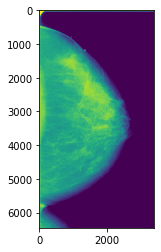

In [181]:
plt.imshow(img.pixel_array)